In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
from sympy.parsing.sympy_parser import parse_expr
from sympy.utilities import lambdify
from sympy import Symbol, integrate

In [3]:
ex = parse_expr("1/(1+exp(-x))")
dex = ex.diff('x')
d2ex = ex.diff('x', 2)
d3ex = ex.diff('x', 3)

In [4]:
print('ex:', ex)
print('dex:', dex)
print('d2ex:', d2ex)
print('d3ex:', d3ex)

ex: 1/(1 + exp(-x))
dex: exp(-x)/(1 + exp(-x))**2
d2ex: (-1 + 2*exp(-x)/(1 + exp(-x)))*exp(-x)/(1 + exp(-x))**2
d3ex: (1 - 6*exp(-x)/(1 + exp(-x)) + 6*exp(-2*x)/(1 + exp(-x))**2)*exp(-x)/(1 + exp(-x))**2


In [5]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)

ex_mas = lambdify(Symbol('x'), ex, 'numpy')(x)
dex_mas = lambdify(Symbol('x'), dex, 'numpy')(x)
d2ex_mas = lambdify(Symbol('x'), d2ex, 'numpy')(x)
d3ex_mas = lambdify(Symbol('x'), d3ex, 'numpy')(x)

In [34]:
def plot(input_list, clear=True, kwargs=None):
    for x, y, label in input_list:
        if clear:
            plt.figure()
        if kwargs:
            plt.plot(x, y, label=label, **kwargs)
        else:
            plt.plot(x, y, label=label)
        plt.legend()

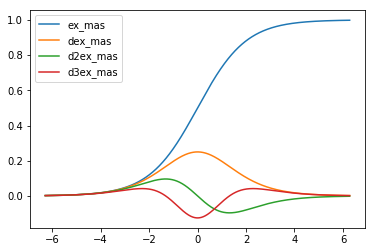

In [35]:
input_list = [[x, ex_mas, 'ex_mas'], 
              [x, dex_mas, 'dex_mas'], 
              [x, d2ex_mas, 'd2ex_mas'], 
              [x, d3ex_mas, 'd3ex_mas']]
plot(input_list, clear=False)

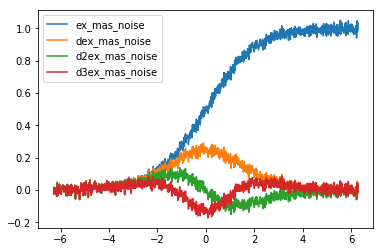

In [45]:
noise = np.random.normal(0,0.02,len(x))
y1 = ex_mas + noise
y2 = dex_mas + noise
y3 = d2ex_mas + noise
y4 = d3ex_mas + noise
input_list_noise = [[x, y1, 'ex_mas_noise'], 
                  [x, y2, 'dex_mas_noise'], 
                  [x, y3, 'd2ex_mas_noise'],
                  [x, y4, 'd3ex_mas_noise']]
plot(input_list_noise, clear=False)

In [46]:
y1_template = str(ex).replace('1', 'a')
y2_template = str(dex).replace('1', 'a')
y3_template = str(d2ex).replace('1', 'a')
y4_template = str(d3ex).replace('1', 'a')
print(y1_template)
print(y2_template)
print(y3_template)
print(y4_template)
search_list =     [[x, y1, 'ex_mas_noise', y1_template], 
                   [x, y2, 'dex_mas_noise', y2_template], 
                   [x, y3, 'd2ex_mas_noise', y3_template],
                   [x, y4, 'd3ex_mas_noise', y4_template]]


a/(a + exp(-x))
exp(-x)/(a + exp(-x))**2
(-a + 2*exp(-x)/(a + exp(-x)))*exp(-x)/(a + exp(-x))**2
(a - 6*exp(-x)/(a + exp(-x)) + 6*exp(-2*x)/(a + exp(-x))**2)*exp(-x)/(a + exp(-x))**2


In [47]:
ans_list = []
for x, y_noise, func_name, y_template in search_list:
    print(y_template)
    appr_func = eval("lambda x, a: "+y_template.replace('exp', 'np.exp'))
    (a), pcov = curve_fit(appr_func, x, y_noise)
    print(a)
    y_solved = appr_func(x, a)
    ans_list.append([x, y_solved, func_name.replace("noise", "solved")])

a/(a + exp(-x))
[1.00393977]
exp(-x)/(a + exp(-x))**2
[0.99654243]
(-a + 2*exp(-x)/(a + exp(-x)))*exp(-x)/(a + exp(-x))**2
[0.99909324]
(a - 6*exp(-x)/(a + exp(-x)) + 6*exp(-2*x)/(a + exp(-x))**2)*exp(-x)/(a + exp(-x))**2
[0.99978893]


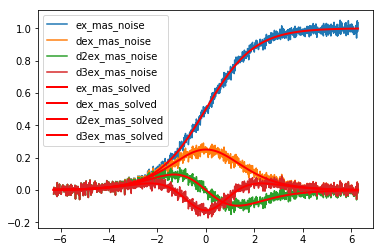

In [50]:
plot(input_list_noise, clear=False)
plot(ans_list, clear=False, kwargs={"linewidth":2.0, "color": "red"})

2.0559523809546842 3.4678571428625253 2.8190476190515863
2.0559523809546842*x**2 + 3.4678571428625253*x + 2.8190476190515863
0.68531746031822807*x**3 + 1.7339285714312627*x**2 + 2.8190476190515863*x


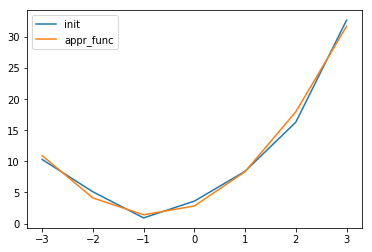

In [48]:
def curve_fit_example():
    def appr_func(x, a, b, c):
        return a*x*x + b*x + c
    x = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0])
    y = np.array([10.3, 5.1, 0.9, 3.6, 8.4, 16.3, 32.7])
    
    (a, b, c), pcov = curve_fit(appr_func, x, y)
    print(a, b, c)
    plot([[x, y, "init"],
          [x, appr_func(x, a, b, c), "appr_func"]], clear=False)
    appr_expr = parse_expr("{}*x*x + {}*x + {}".format(a, b, c))
    print(appr_expr)
    print(integrate(appr_expr, Symbol('x')))
curve_fit_example()